# Task 1: Introduction

Import TensorFlow

In [1]:
import tensorflow as tf

#tf.logging.set_verbosity(tf.logging.ERROR)
#print('Using TensorFlow version', tf.__version__)

# Task 2: The Dataset

Import MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('x train shape :', x_train.shape)
print('y train shape :', y_train.shape)
print('x test shape :', x_test.shape)
print('y test shape :', y_test.shape)

x train shape : (60000, 28, 28)
y train shape : (60000,)
x test shape : (10000, 28, 28)
y test shape : (10000,)


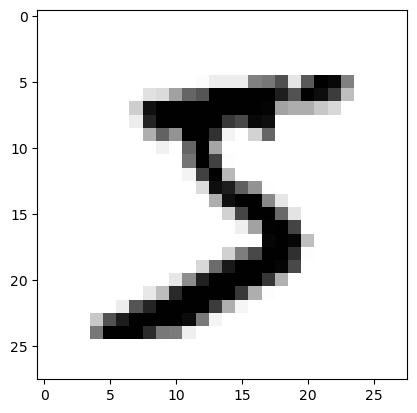

In [4]:
from matplotlib import pyplot as plt 
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()

Display Labels

In [5]:
y_train[0]

5

In [6]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding

Encoding Labels

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

Validated Shapes

In [8]:
print('y train encoded shape :', y_train_encoded.shape)
print('y test encoded shape :', y_test_encoded.shape)

y train encoded shape : (60000, 10)
y test encoded shape : (10000, 10)


Display Encoded Labels

In [9]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Task 4: Preprocessing the Examples

Unrolling N-dimensional Arrays to Vectors

In [10]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x train  reshaped shape :', x_train_reshaped.shape)
print('x test  reshaped shape :', x_test_reshaped.shape)

x train  reshaped shape : (60000, 784)
x test  reshaped shape : (10000, 784)


Display Pixel Values

In [11]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


Data Normalization

In [12]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

Display Normalized Pixel Values

In [13]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 5: Creating a Model

Creating the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784, )),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the Model

In [15]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Task 6: Training the Model

Training the Model

In [16]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 830us/step - accuracy: 0.8180 - loss: 0.6113
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.9412 - loss: 0.1987
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.9581 - loss: 0.1454


Evaluating the Model

In [17]:
_,accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy', accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.9529 - loss: 0.1452
Test set accuracy 96.02000117301941


# Task 7: Predictions

Predictions on Test Set

In [18]:
preds = model.predict(x_test_norm)
print('Shape of preds:', preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
Shape of preds: (10000, 10)


Plotting the Results

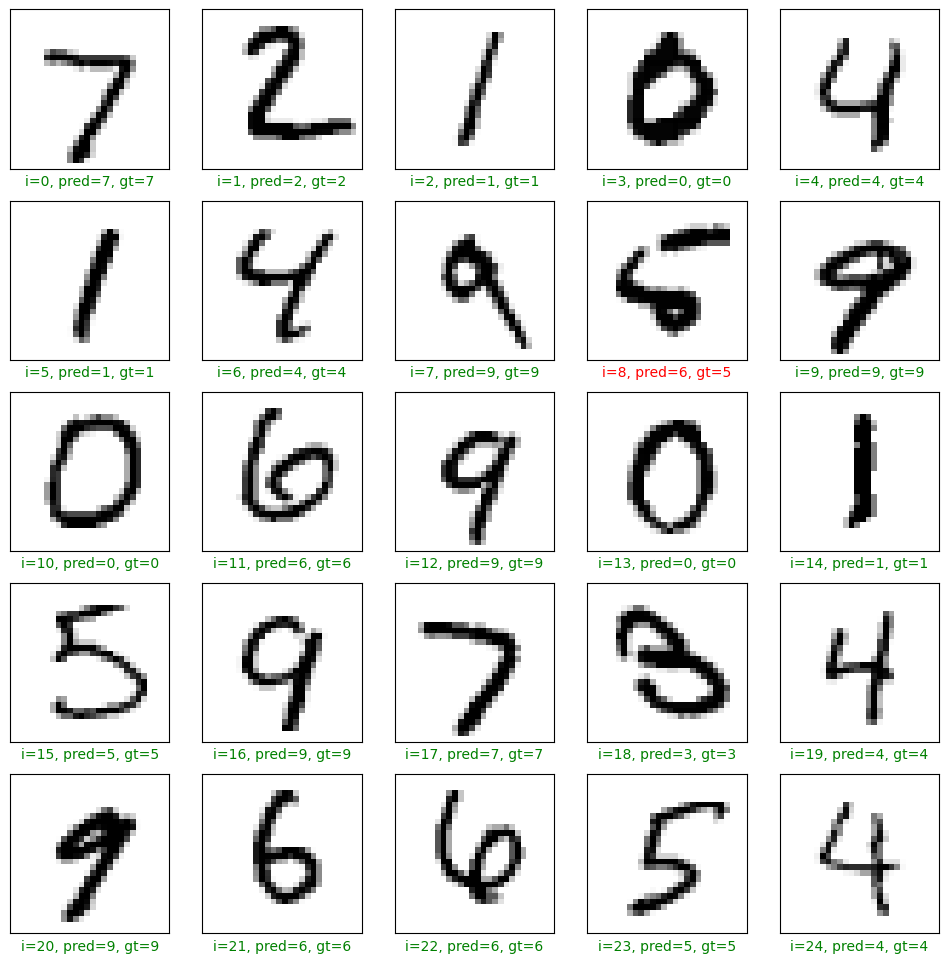

In [19]:
plt.figure(figsize=(12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    col = 'g'
    if pred !=gt:
        col = 'r'
        
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(x_test[start_index+i], cmap='binary')

plt.show()


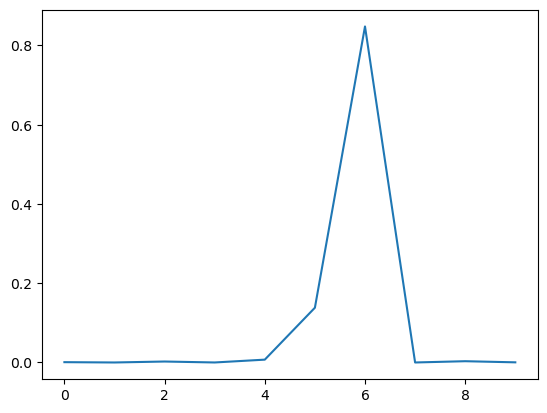

In [20]:
plt.plot(preds[8])
plt.show()